# Experimento 1 - Atividade 1
### Alinhamento e estudo de uma lente simples

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import exp_physics as ep
import pandas as pd
import scipy.optimize as scp

### Dados

In [3]:
df = pd.read_csv('Dados/dados.csv', decimal=',')

In [4]:
df

,d (mm),x (mm),inc d (mm),inc x (mm)
0,0.00,1.8,0.025,NaN
1,0.70,-0.2,0.025,NaN
2,1.62,-5.2,0.025,NaN
3,2.48,-10.2,0.025,NaN
4,2.80,-15.2,0.025,NaN
5,3.62,-20.2,0.025,NaN
6,5.88,-25.2,NaN,NaN
7,7.44,-30.2,NaN,NaN
8,7.80,-35.2,NaN,NaN
9,8.84,-40.2,NaN,NaN


In [5]:
df['inc d (mm)'] = 0.025
df['inc x (mm)'] = 2

In [6]:
df

,d (mm),x (mm),inc d (mm),inc x (mm)
0,0.00,1.8,0.025,2
1,0.70,-0.2,0.025,2
2,1.62,-5.2,0.025,2
3,2.48,-10.2,0.025,2
4,2.80,-15.2,0.025,2
5,3.62,-20.2,0.025,2
6,5.88,-25.2,0.025,2
7,7.44,-30.2,0.025,2
8,7.80,-35.2,0.025,2
9,8.84,-40.2,0.025,2


#### Análise

In [7]:
func=  lambda x, a, b: a*x + b

In [8]:
fit, cov = scp.curve_fit(func, xdata = df['d (mm)'], ydata = df['x (mm)'])

In [9]:
fit

array([-4.00387818, -1.5821775 ])

In [10]:
cov

array([[ 0.02169003, -0.16958892],
       [-0.16958892,  2.01342096]])

In [11]:
np.round(np.sqrt(np.abs(cov)),3)

array([[0.147, 0.412],
       [0.412, 1.419]])

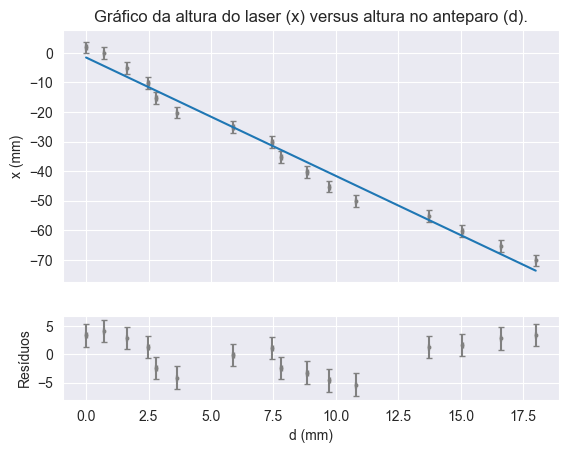

In [12]:
ep.residual_plot(x=df['d (mm)'], 
                 y=df['x (mm)'],
                func=func,
                params=fit,
                y_title='x (mm)',
                x_title='d (mm)',
                title='Gráfico da altura do laser (x) versus altura no anteparo (d).',
                residual_title='Resíduos',
                y_sigma=df['inc x (mm)'],
                x_sigma=df['inc d (mm)'])

In [14]:
dof = len(df.index) -2
dof

14

In [15]:
ep.chisquare(vals=df['x (mm)'],
             exp=func(df['d (mm)'], fit[0], fit[1]),
             sigma=df['inc x (mm)'])

38.49706824563724

In [17]:
ep.chisquare(vals=df['x (mm)'],
             exp=func(df['d (mm)'], fit[0], fit[1]),
             sigma=df['inc x (mm)'],
             dof=dof)

2.7497905889740886

### Testes

#### Experimental

In [23]:
f_exp = (190-72)/(1+4.003)

In [24]:
f_exp

23.585848490905455

In [25]:
n = len(df['x (mm)'])

In [27]:
# Teste-T

np.abs((20-f_exp)/(0.01/np.sqrt(n)))

1434.339396362182

#### Teórico

In [3]:
f_teo = 1/ ( (1/(72-42)) + (1/(190-72)) )

In [5]:
f_teo

23.91891891891892